In [203]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import probplot

from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score ,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split




In [204]:
df=pd.read_csv('concrete_data.csv')
df.sample(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
509,424.0,22.0,132.0,168.0,8.9,822.0,750.0,28,72.10
391,397.0,17.2,158.0,167.0,20.8,967.0,633.0,28,55.65
453,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,56,31.72
762,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,32.72
599,339.0,0.0,0.0,197.0,0.0,968.0,781.0,7,20.97
341,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,28,47.40
593,252.5,0.0,0.0,185.7,0.0,1111.6,784.3,7,11.48
723,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,28,27.83
767,385.0,0.0,0.0,186.0,0.0,966.0,763.0,28,31.35
419,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,14,16.88


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [206]:
df.duplicated().sum()

np.int64(25)

In [207]:
df.drop_duplicates(inplace=True)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1005 non-null   float64
 1   Blast Furnace Slag  1005 non-null   float64
 2   Fly Ash             1005 non-null   float64
 3   Water               1005 non-null   float64
 4   Superplasticizer    1005 non-null   float64
 5   Coarse Aggregate    1005 non-null   float64
 6   Fine Aggregate      1005 non-null   float64
 7   Age                 1005 non-null   int64  
 8   Strength            1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [209]:
df.shape

(1005, 9)

In [210]:
df.tail(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [211]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [212]:
x=df.drop(columns=['Strength'])
y=df.iloc[:,-1]

In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32,test_size=0.2)

In [214]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
304,277.1,0.0,97.4,160.6,11.8,973.9,875.6,3
446,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,56
812,310.0,0.0,0.0,192.0,0.0,970.0,850.0,90
747,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3
914,313.0,145.0,0.0,178.0,8.0,1002.0,689.0,28
...,...,...,...,...,...,...,...,...
917,148.0,175.0,0.0,171.0,2.0,1000.0,828.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
926,162.0,214.0,164.0,202.0,10.0,820.0,680.0,28
579,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,28


In [215]:
x_test

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28
919,313.0,0.0,0.0,178.0,8.0,1000.0,822.0,28
852,298.0,0.0,107.0,186.0,6.0,879.0,815.0,28
396,516.0,0.0,0.0,162.0,8.3,801.0,802.0,28
528,359.0,19.0,141.0,154.0,10.9,942.0,801.0,7
...,...,...,...,...,...,...,...,...
736,238.0,0.0,0.0,186.0,0.0,1119.0,789.0,7
104,318.8,212.5,0.0,155.7,14.3,852.1,880.4,7
687,236.0,157.0,0.0,192.0,0.0,972.6,749.1,90
388,385.0,0.0,136.0,158.0,20.0,903.0,768.0,28


In [216]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [217]:
y_pred=model.predict(x_test)
print('R2 Score:\t',r2_score(y_test,y_pred))

R2 Score:	 0.5616682220322878


In [218]:
model=LinearRegression()
np.mean(cross_val_score(model,x,y,cv=8,n_jobs=-1,scoring='r2'))

np.float64(0.38218077047234844)

# Plotting the Entire Plot of Input Columns 

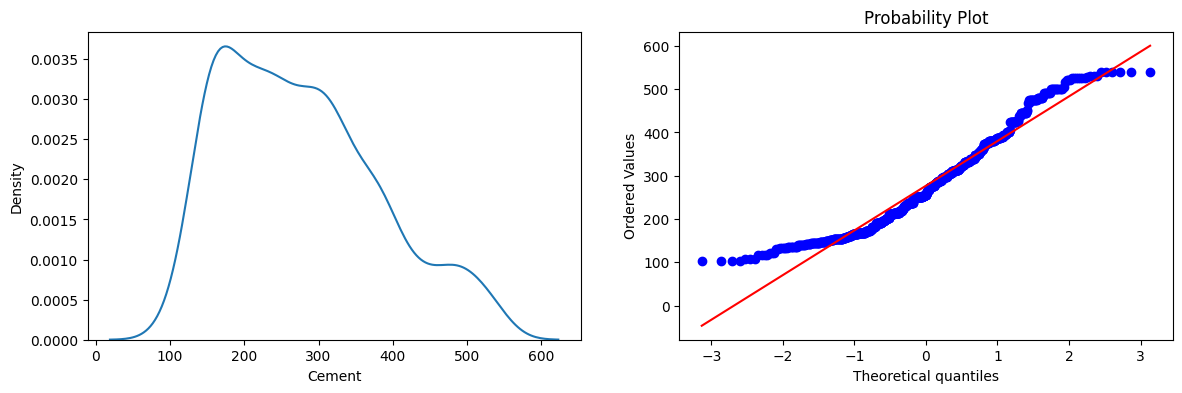

The skewness in data is=	0.5808953018842061


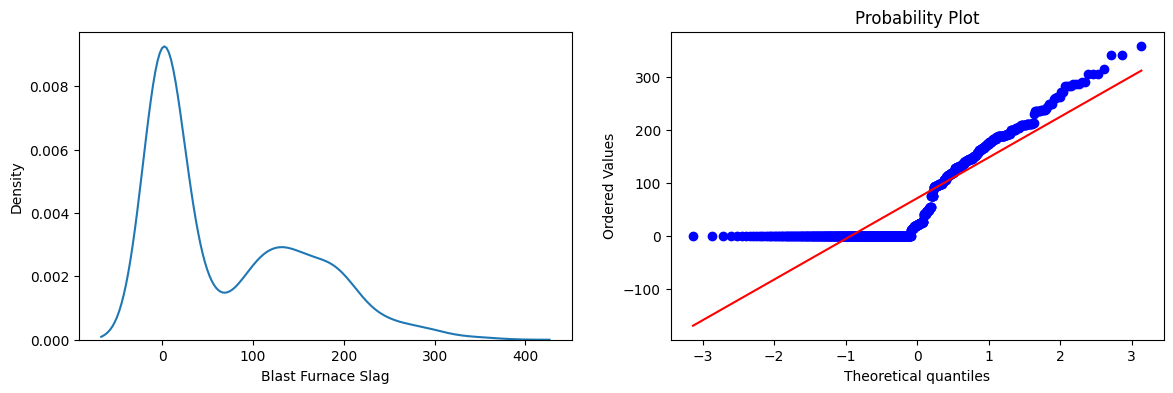

The skewness in data is=	0.8494577544757731


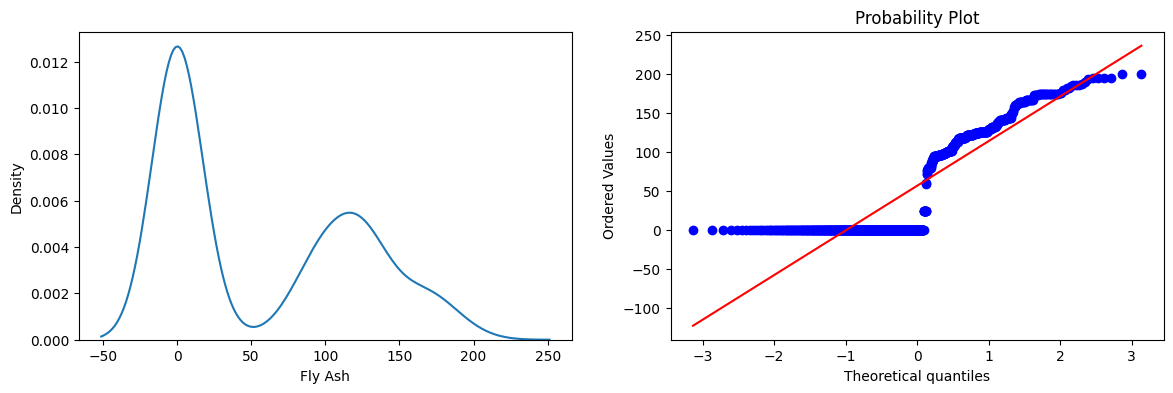

The skewness in data is=	0.4871337945379788


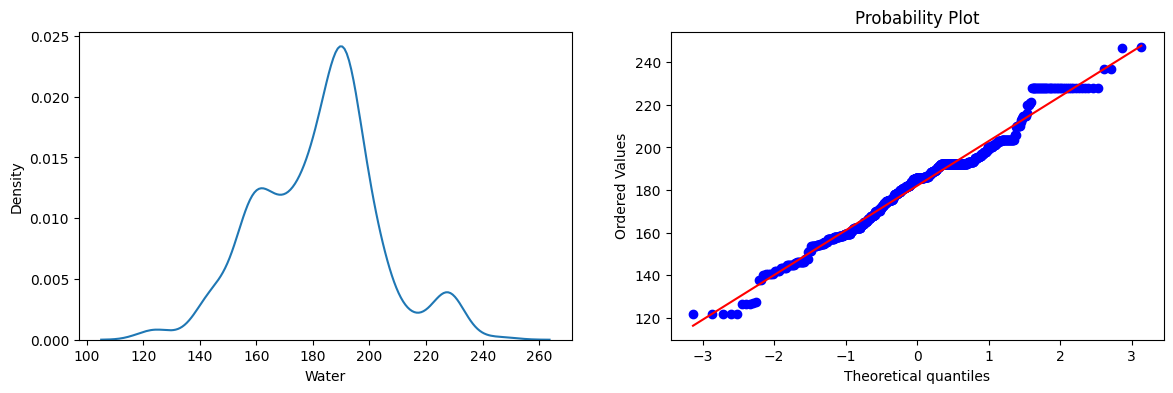

The skewness in data is=	0.024173908210956416


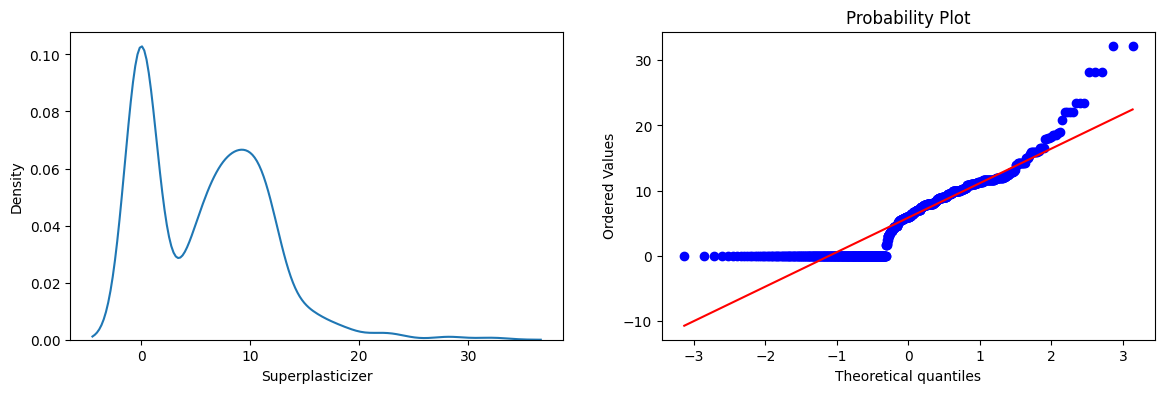

The skewness in data is=	0.8045005002627684


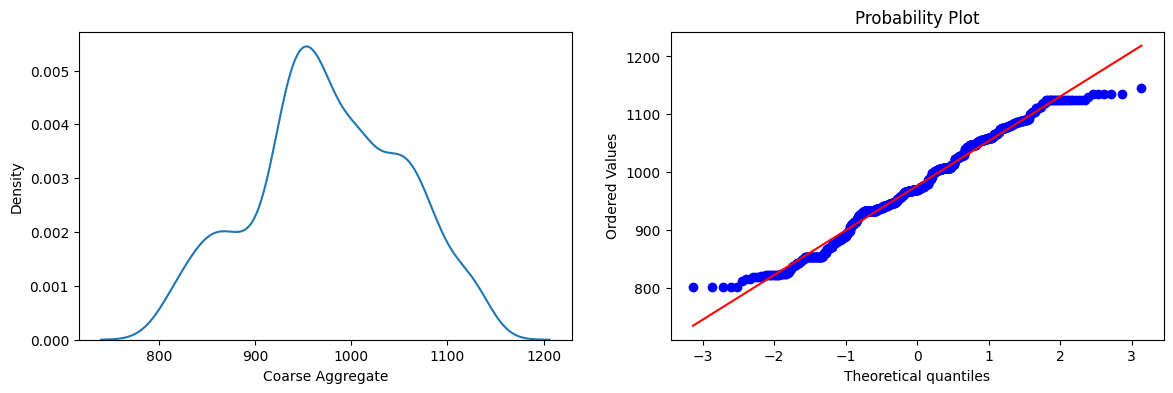

The skewness in data is=	-0.07412673866480553


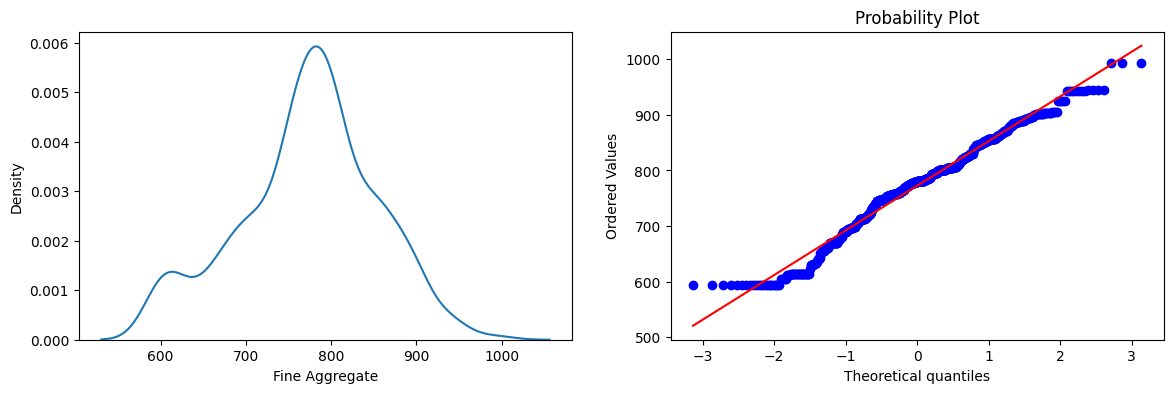

The skewness in data is=	-0.2514543821250928


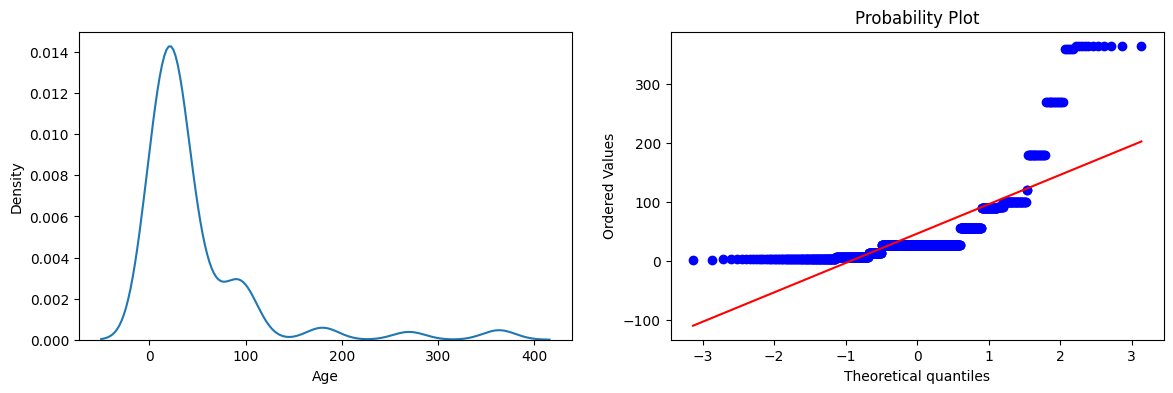

The skewness in data is=	3.198012500517926


In [219]:
for cols in x.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train[cols])

    plt.subplot(122)
    probplot(x_train[cols],plot=plt)
    plt.savefig(f'QQ and KDEPLOT On {cols}.png')
    plt.show()
    skew=x_train[cols].skew()
    print(f'The skewness in data is=\t{skew}')

In [220]:
trf1=PowerTransformer(method='box-cox')
x_train_transformed=trf1.fit_transform(x_train+0.00001)
x_test_transformed=trf1.transform(x_test+0.00001)
x_train_transformed=pd.DataFrame(x_train_transformed,columns=x_train.columns)
x_test_transformed=pd.DataFrame(x_test_transformed,columns=x_train.columns)

In [221]:
box_cox_lambdas=pd.DataFrame({'columns':x_train.columns,'Lambdas':trf1.lambdas_})
box_cox_lambdas.to_csv('box_cox_transformed_lambdas.csv')

In [222]:
box_cox_lambdas

,columns,Lambdas
0,Cement,0.089361
1,Blast Furnace Slag,0.022347
2,Fly Ash,-0.027031
3,Water,0.962093
4,Superplasticizer,0.107208
5,Coarse Aggregate,1.313312
6,Fine Aggregate,1.834127
7,Age,0.045940


In [223]:
model2=LinearRegression(n_jobs=-1)
model2.fit(x_train_transformed,y_train)

LinearRegression(n_jobs=-1)

In [224]:
y_pred=model2.predict(x_test_transformed)
print('R2 Score is =\t',r2_score(y_test,y_pred))

R2 Score is =	 0.7889709810273264


# Checking Using Cross VAlidation Score 

In [225]:
pt1=PowerTransformer(method='box-cox')
x_transformed=pt1.fit_transform(x+0.0001)
x_transformed=pd.DataFrame(x_transformed,columns=x.columns)
model3=LinearRegression()
np.mean(cross_val_score(model3,x_transformed,y,cv=8,n_jobs=-1,scoring='r2'))

np.float64(0.6850908525409755)

In [226]:
type(x_train_transformed)

pandas.core.frame.DataFrame

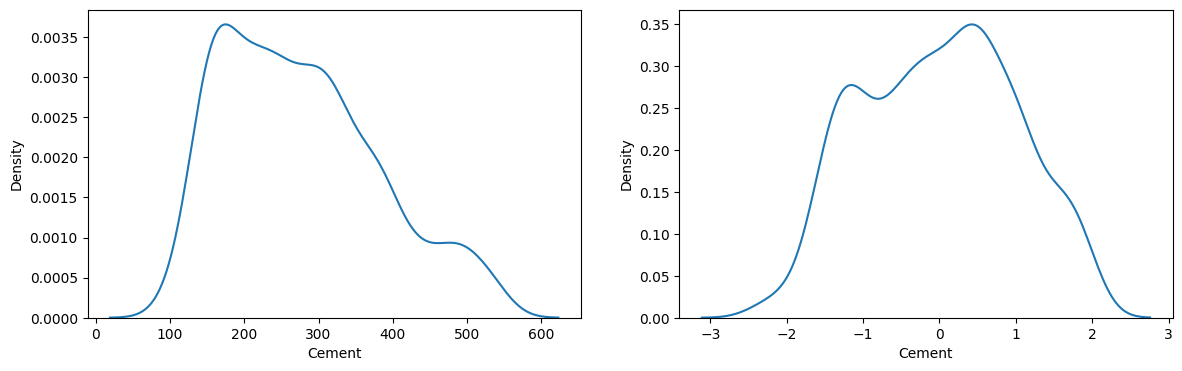

The skewness Before in data is=	0.5808953018842061
 The Skewness After in Data is=	-0.01003276827484915


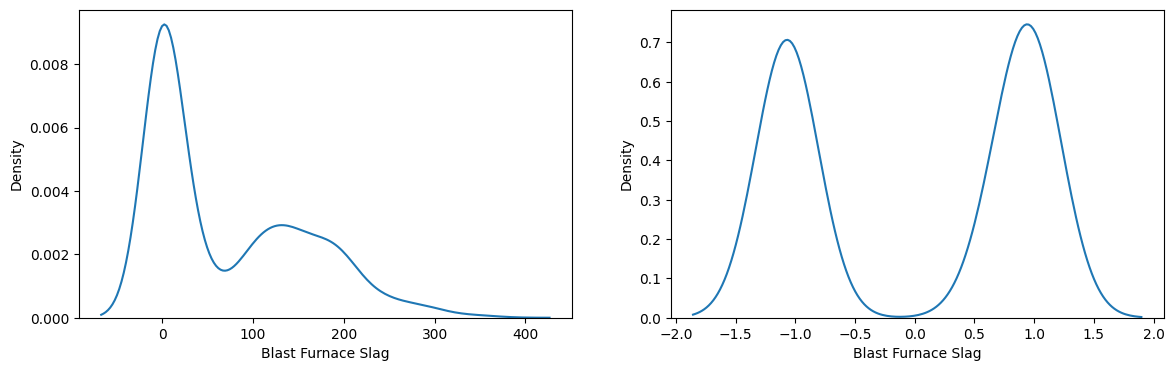

The skewness Before in data is=	0.8494577544757731
 The Skewness After in Data is=	-0.11957543702644982


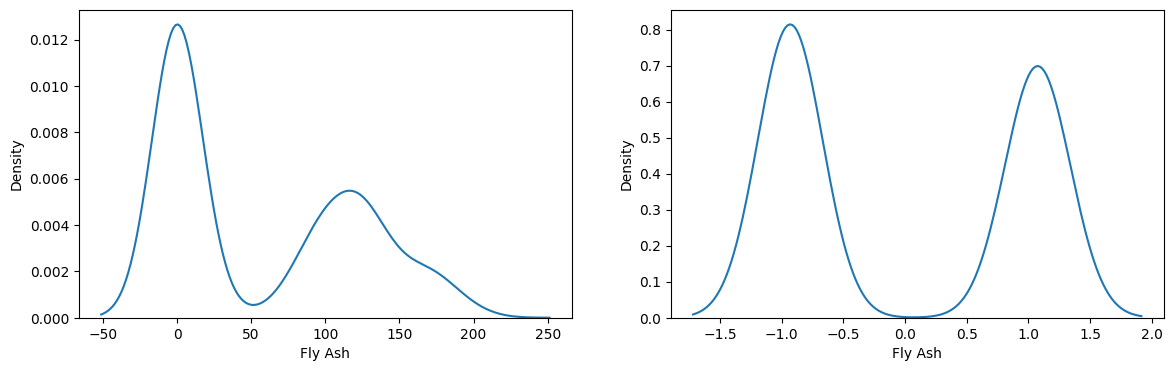

The skewness Before in data is=	0.4871337945379788
 The Skewness After in Data is=	0.1466395576521345


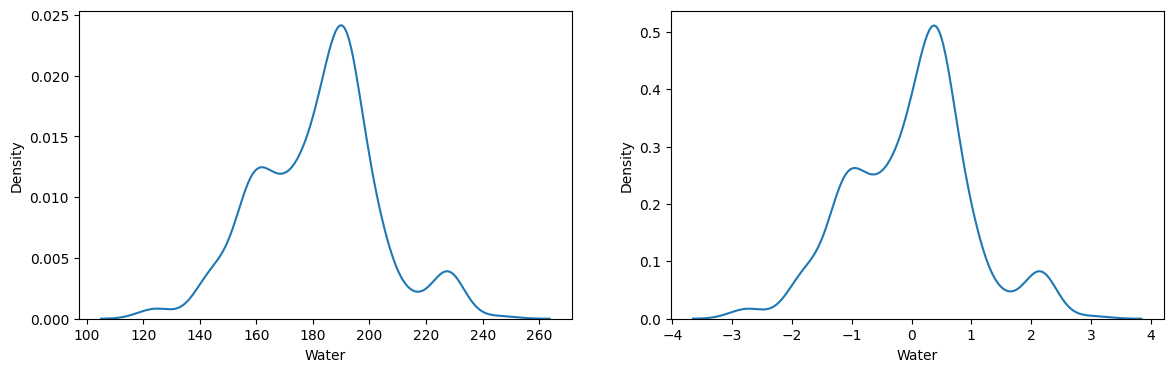

The skewness Before in data is=	0.024173908210956416
 The Skewness After in Data is=	0.009108259736347876


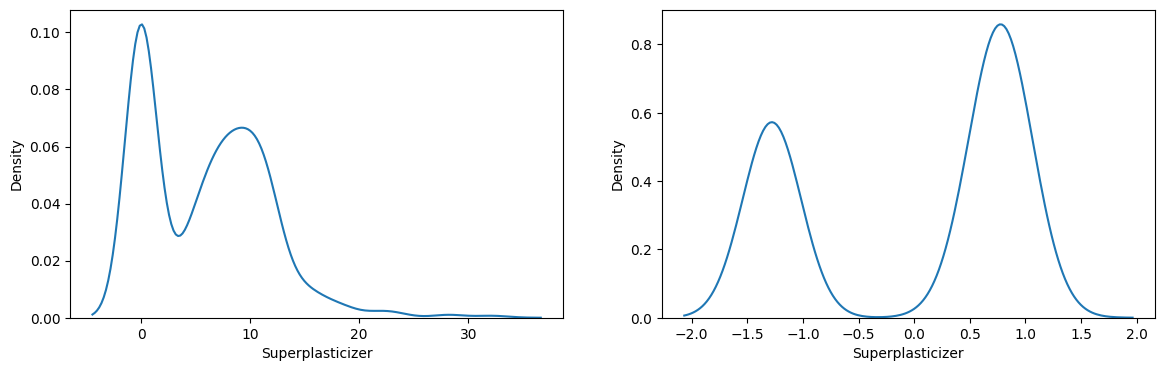

The skewness Before in data is=	0.8045005002627684
 The Skewness After in Data is=	-0.4793357401518958


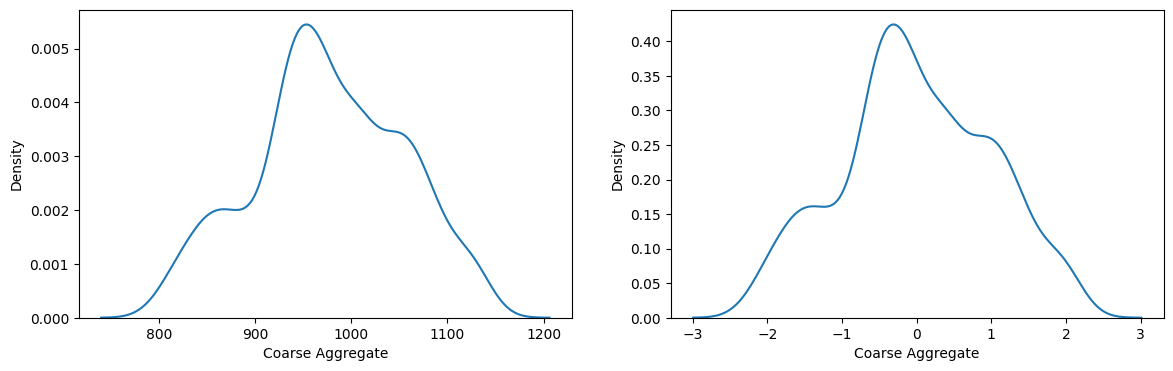

The skewness Before in data is=	-0.07412673866480553
 The Skewness After in Data is=	-0.02109608953379755


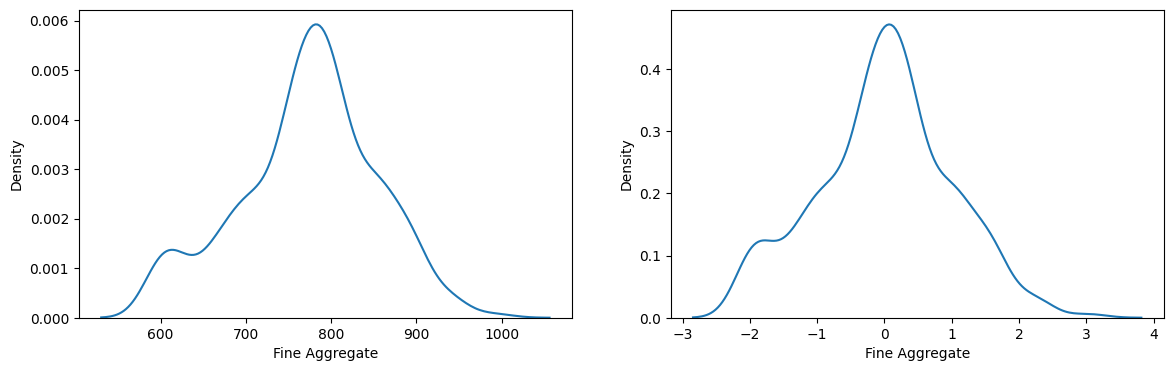

The skewness Before in data is=	-0.2514543821250928
 The Skewness After in Data is=	-0.017428856795980507


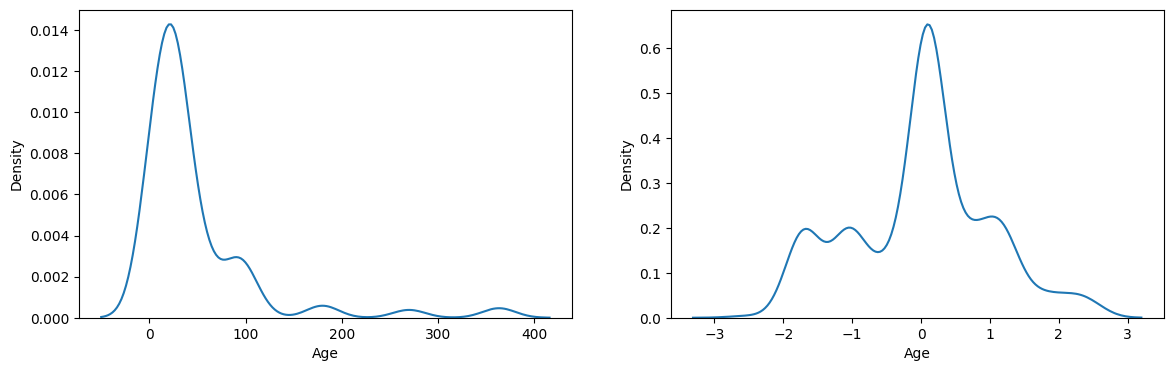

The skewness Before in data is=	3.198012500517926
 The Skewness After in Data is=	-0.004626639144887597


In [227]:
for cols in x.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train[cols])

    plt.subplot(122)
    sns.kdeplot(x_train_transformed[cols])
    plt.savefig(f'After transformation QQ and KDEPLOT On {cols}.png')
    plt.show()
    skew=x_train[cols].skew()
    skew2=x_train_transformed[cols].skew()
    print(f'The skewness Before in data is=\t{skew}\n The Skewness After in Data is=\t{skew2}')

# Applying Yeo Johnson Transformation 

In [228]:
trf2=PowerTransformer(method='yeo-johnson')
x_train_transformed2=trf2.fit_transform(x_train+0.00001)
x_test_transformed2=trf2.transform(x_test+0.00001)
x_train_transformed2=pd.DataFrame(x_train_transformed2,columns=x_train.columns)
x_test_transformed2=pd.DataFrame(x_test_transformed2,columns=x_train.columns)

In [229]:
model4=LinearRegression(n_jobs=-1)
model4.fit(x_train_transformed2,y_train)

LinearRegression(n_jobs=-1)

In [230]:
y_pred2=model4.predict(x_test_transformed2)
print('R2 Score=\t',r2_score(y_test,y_pred2))

R2 Score=	 0.7941781295109506


# Checking Model Using Cross Validation Score 

In [231]:
model5=LinearRegression()
pt2=PowerTransformer()
x_transformed2=pt2.fit_transform(x)
x_transformed2=pd.DataFrame(x_transformed2,columns=x.columns)
print(np.mean(cross_val_score(model5,x_transformed2,y,n_jobs=-1,cv=10)))

0.66551545274151


In [232]:
all_lambdas=pd.DataFrame({'columns':x.columns,'Box-Cox_lambdas':trf1.lambdas_,'Yeo-Johson_Lambdas':trf2.lambdas_,'Cross-Val-Box-Cox_Lambdas':pt1.lambdas_,'Cross-Val-Yeo-johnson_Lambdas':pt2.lambdas_})

In [233]:
all_lambdas

,columns,Box-Cox_lambdas,Yeo-Johson_Lambdas,Cross-Val-Box-Cox_Lambdas,Cross-Val-Yeo-johnson_Lambdas
0,Cement,0.089361,0.086240,0.116625,0.113625
1,Blast Furnace Slag,0.022347,-0.001364,0.022669,-0.005725
2,Fly Ash,-0.027031,-0.103046,-0.033605,-0.109164
3,Water,0.962093,0.961756,0.923822,0.923320
4,Superplasticizer,0.107208,0.255461,0.126557,0.238200
5,Coarse Aggregate,1.313312,1.313728,1.265407,1.265774
6,Fine Aggregate,1.834127,1.835286,1.825456,1.826589
7,Age,0.045940,-0.002084,0.045662,-0.001972


In [234]:
all_lambdas.to_csv('All_Lambdas.csv')

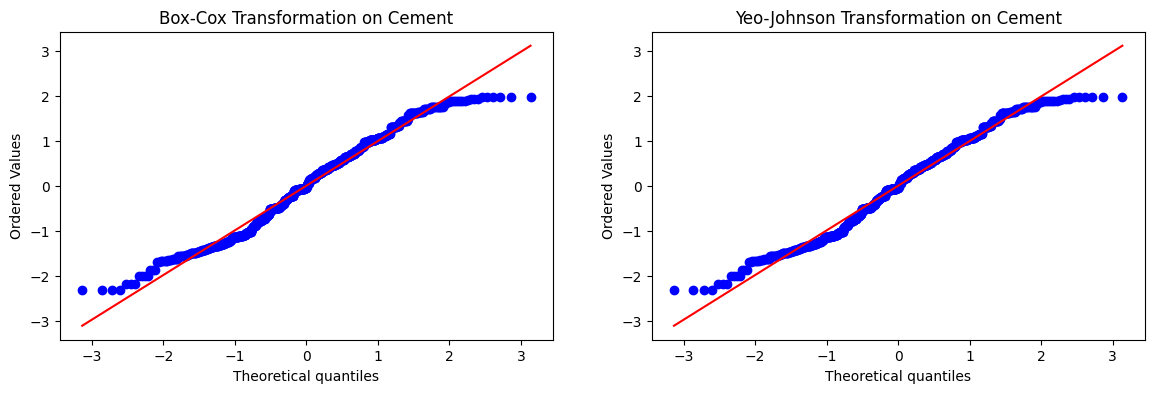

The skewness on Applying Box-COx Transformer is= -0.01003276827484915	 Applying Yeo-Johnson Tranformer is= -0.009648475204217561


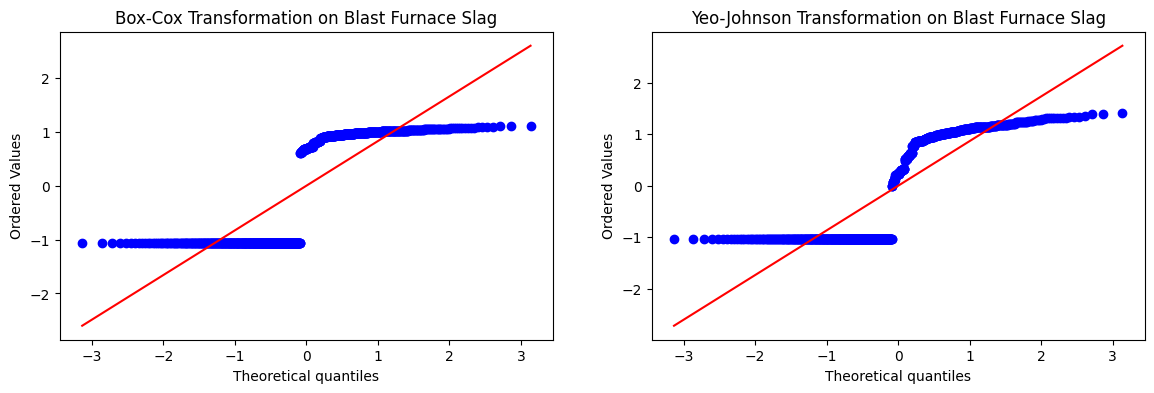

The skewness on Applying Box-COx Transformer is= -0.11957543702644982	 Applying Yeo-Johnson Tranformer is= 0.002048769112876052


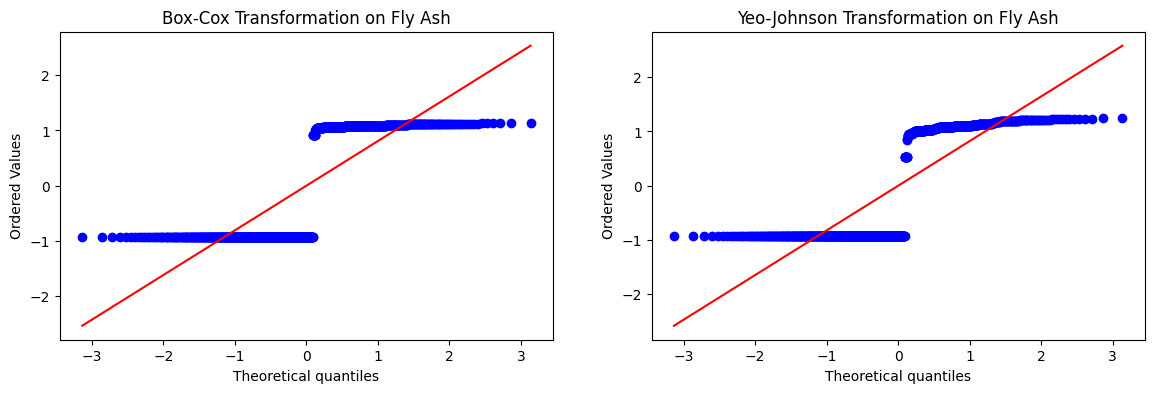

The skewness on Applying Box-COx Transformer is= 0.1466395576521345	 Applying Yeo-Johnson Tranformer is= 0.16292359818880353


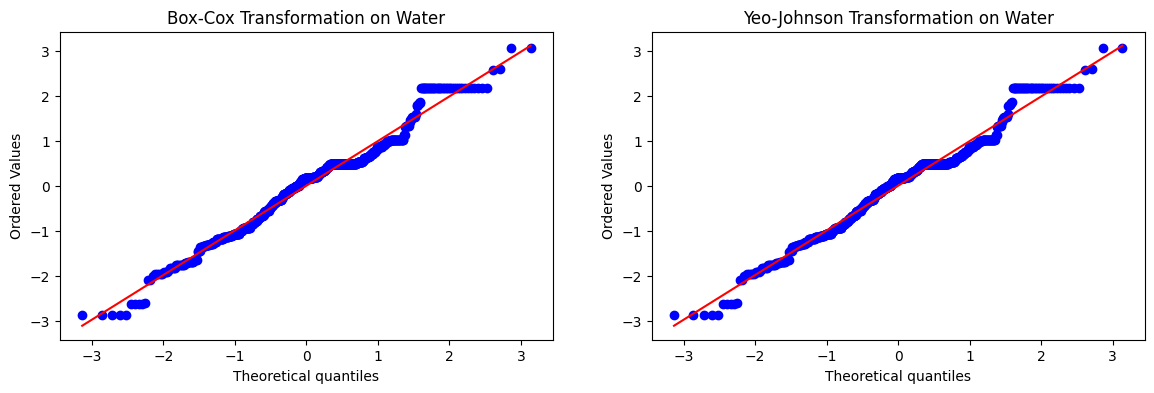

The skewness on Applying Box-COx Transformer is= 0.009108259736347876	 Applying Yeo-Johnson Tranformer is= 0.009059181790222845


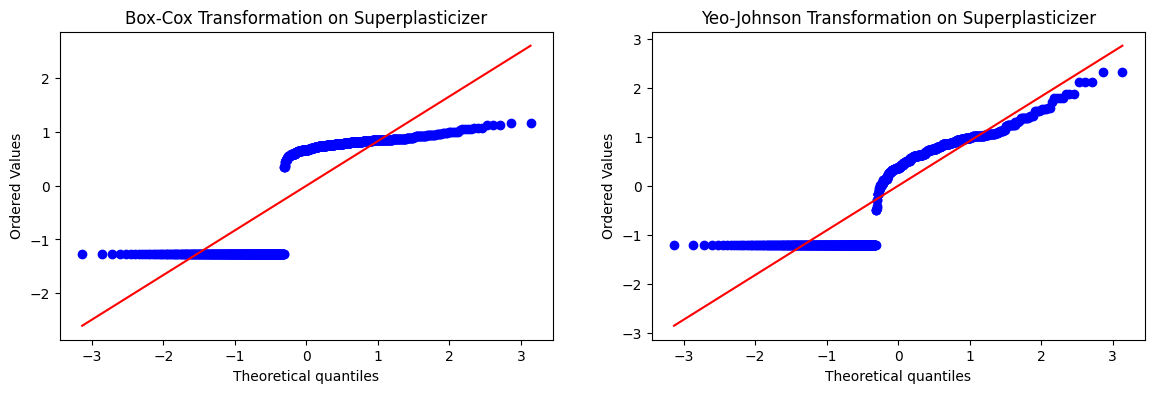

The skewness on Applying Box-COx Transformer is= -0.4793357401518958	 Applying Yeo-Johnson Tranformer is= -0.15864411375292997


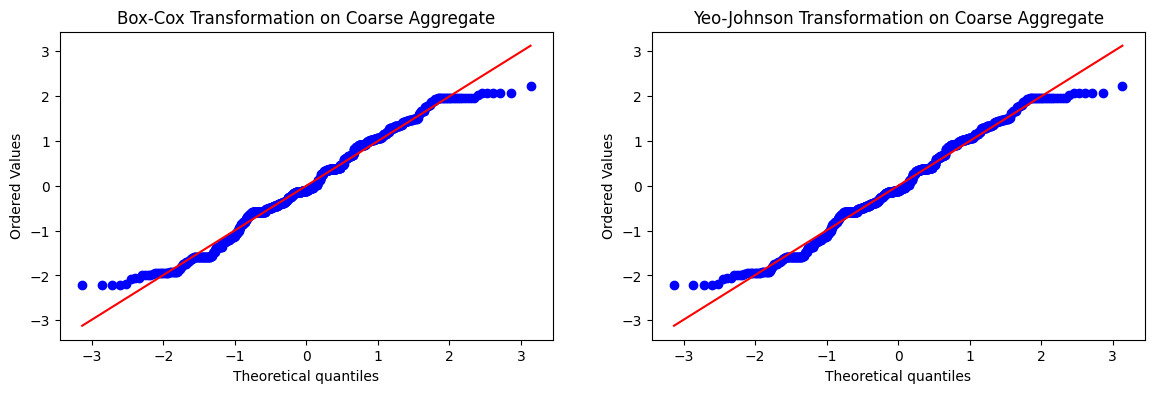

The skewness on Applying Box-COx Transformer is= -0.02109608953379755	 Applying Yeo-Johnson Tranformer is= -0.021080631843668193


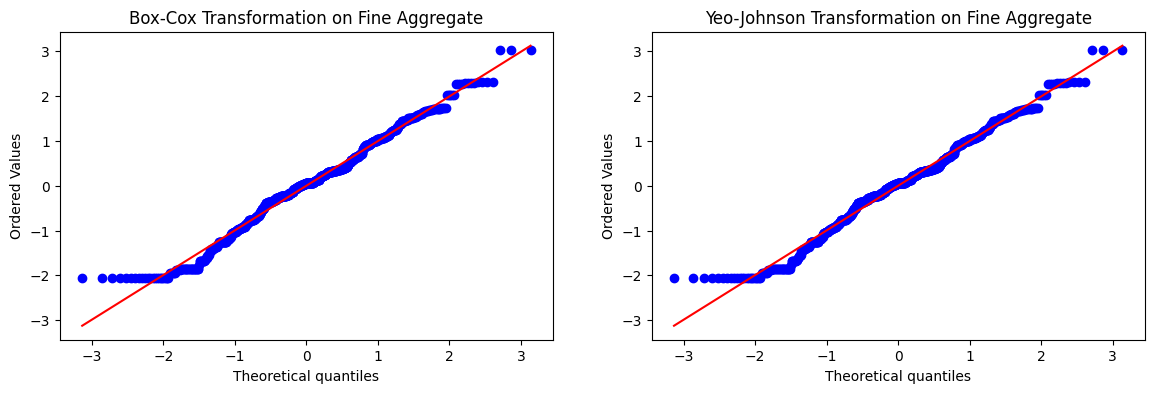

The skewness on Applying Box-COx Transformer is= -0.017428856795980507	 Applying Yeo-Johnson Tranformer is= -0.017409661536566673


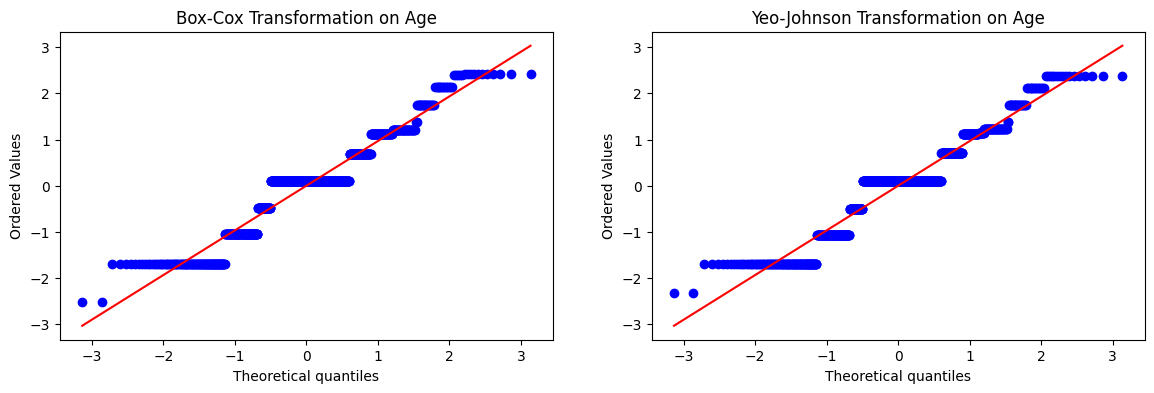

The skewness on Applying Box-COx Transformer is= -0.004626639144887597	 Applying Yeo-Johnson Tranformer is= 0.00023600196878577822


In [235]:
for cols in x.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    probplot(x_train_transformed[cols],plot=plt)
    plt.title(f'Box-Cox Transformation on {cols}')
    plt.subplot(122)
    probplot(x_train_transformed2[cols],plot=plt)
    plt.title(f'Yeo-Johnson Transformation on {cols}')
    plt.savefig(f'Box Cox and Yeo Johnson Trans On {cols}.png')
    plt.show()
    skew=x_train_transformed[cols].skew()
    skew2=x_train_transformed2[cols].skew()
    print(f'The skewness on Applying Box-COx Transformer is= {skew}\t Applying Yeo-Johnson Tranformer is= {skew2}')

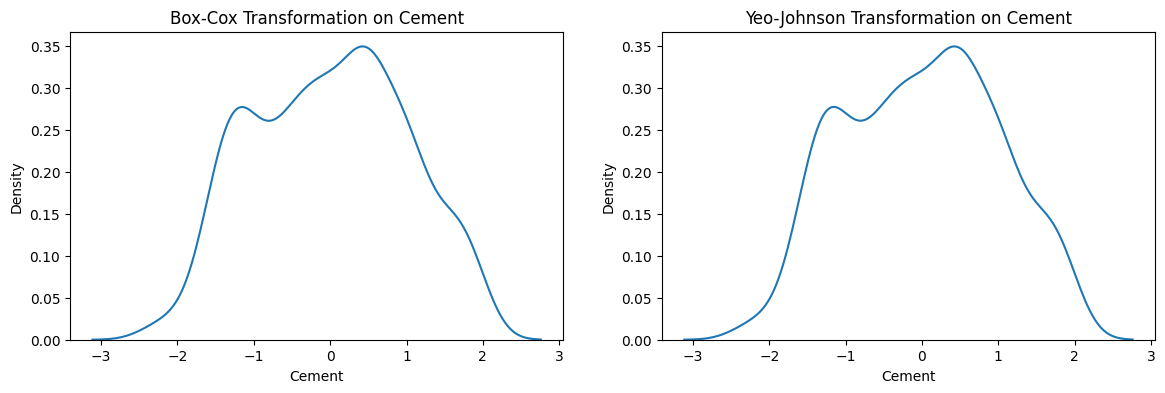

The skewness on Applying Box-COx Transformer is= -0.01003276827484915	 Applying Yeo-Johnson Tranformer is= -0.009648475204217561


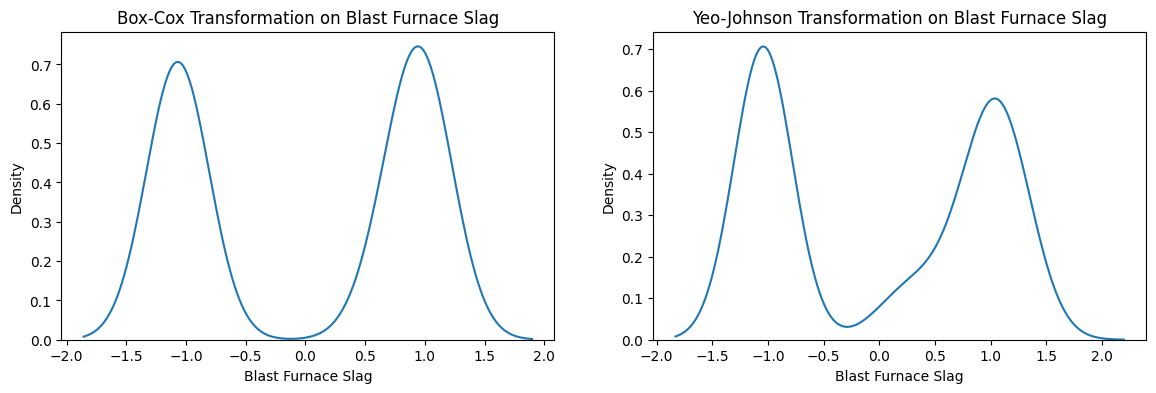

The skewness on Applying Box-COx Transformer is= -0.11957543702644982	 Applying Yeo-Johnson Tranformer is= 0.002048769112876052


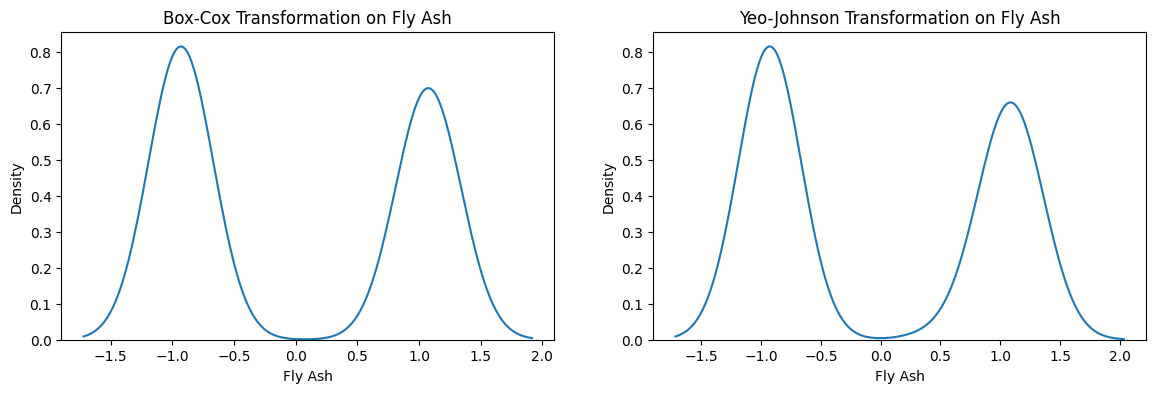

The skewness on Applying Box-COx Transformer is= 0.1466395576521345	 Applying Yeo-Johnson Tranformer is= 0.16292359818880353


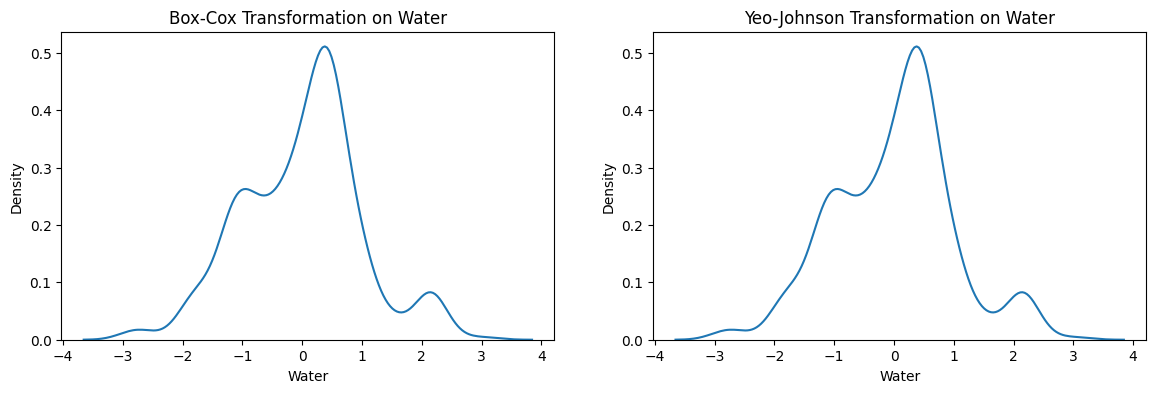

The skewness on Applying Box-COx Transformer is= 0.009108259736347876	 Applying Yeo-Johnson Tranformer is= 0.009059181790222845


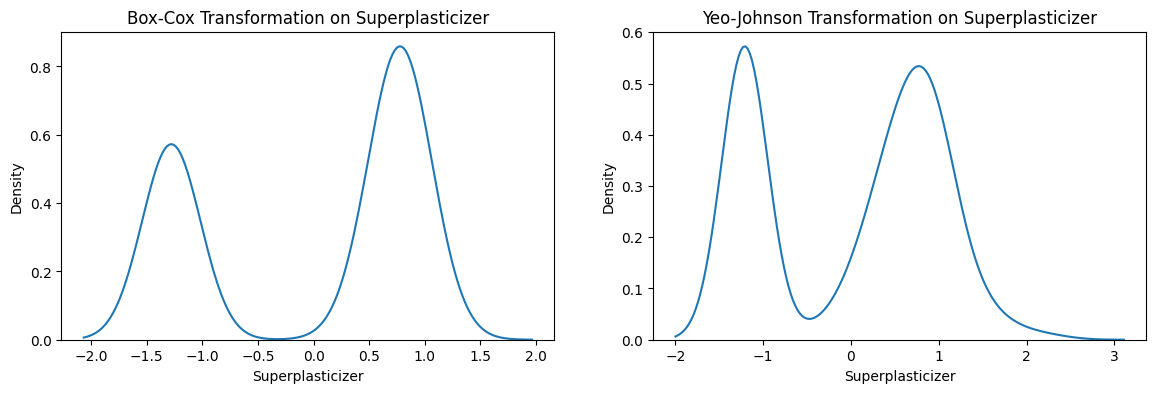

The skewness on Applying Box-COx Transformer is= -0.4793357401518958	 Applying Yeo-Johnson Tranformer is= -0.15864411375292997


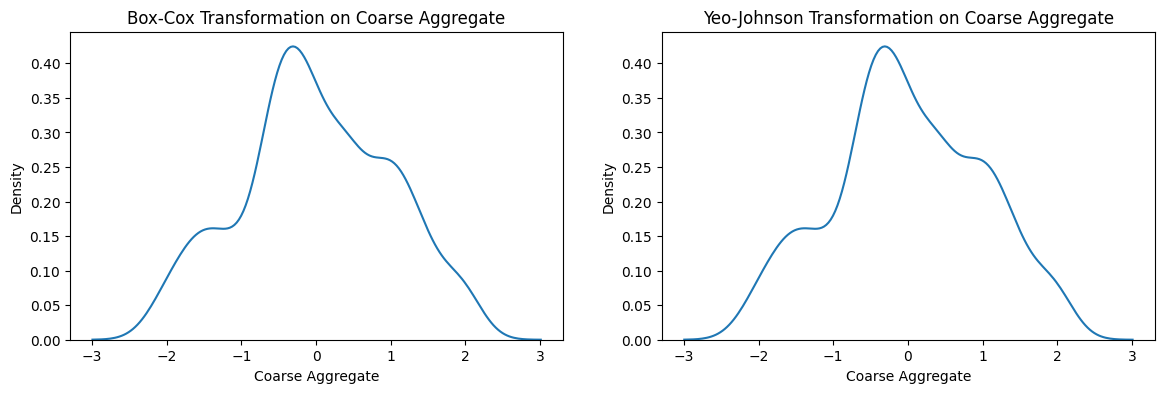

The skewness on Applying Box-COx Transformer is= -0.02109608953379755	 Applying Yeo-Johnson Tranformer is= -0.021080631843668193


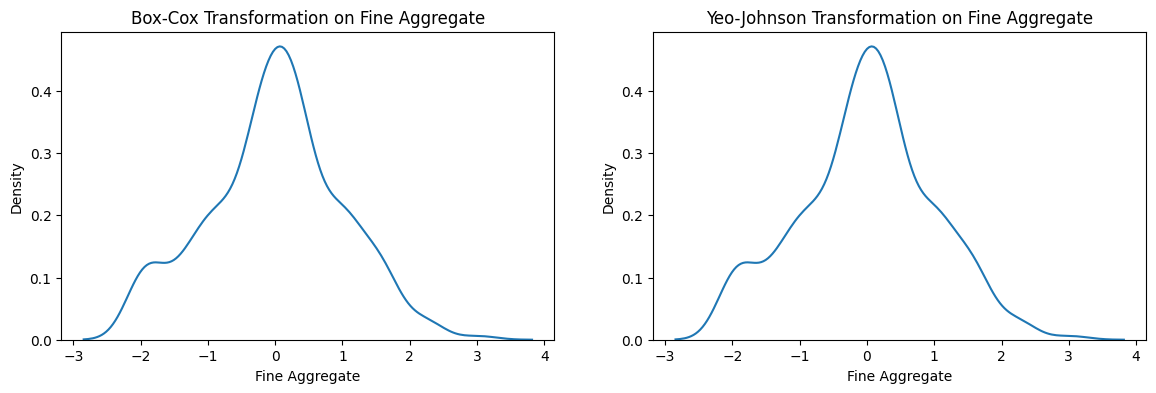

The skewness on Applying Box-COx Transformer is= -0.017428856795980507	 Applying Yeo-Johnson Tranformer is= -0.017409661536566673


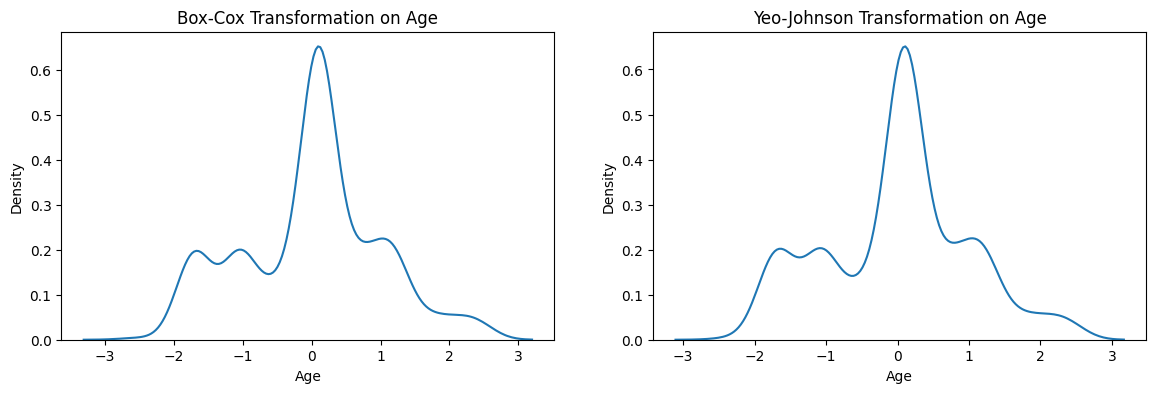

The skewness on Applying Box-COx Transformer is= -0.004626639144887597	 Applying Yeo-Johnson Tranformer is= 0.00023600196878577822


In [236]:
for cols in x.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train_transformed[cols])
    plt.title(f'Box-Cox Transformation on {cols}')
    plt.subplot(122)
    sns.kdeplot(x_train_transformed2[cols])
    plt.title(f'Yeo-Johnson Transformation on {cols}')
    plt.savefig(f'KDEPLOT of Box Cox and Yeo Johnson Trans On {cols}.png')
    plt.show()
    skew=x_train_transformed[cols].skew()
    skew2=x_train_transformed2[cols].skew()
    print(f'The skewness on Applying Box-COx Transformer is= {skew}\t Applying Yeo-Johnson Tranformer is= {skew2}')